## Оглавление
<a id = "index"></a>

1. [Задание](#task)
1. [Описание данных](#data_description)
1. [Схема данных](#data_chema)
1. [Настройка окружения](#env)
1. [Изучение таблиц](#first_look)
1. [Анализ данных](#eda)
1. [Выводы](#conclusion)

## Задание
<a id = "task"></a>
[В оглавление](#index)

Коронавирус застал мир врасплох, изменив привычный порядок вещей.  
В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг.  
Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке.  
Ваша первая задача как аналитика — проанализировать базу данных.  
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.  
Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Задания

1. Посчитать, сколько книг вышло после 1 января 2000 года.
- Для каждой книги посчитать количество обзоров и среднюю оценку.
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц (так исключаются из анализа брошюры).
- Определить автора с самой высокой средней оценкой книг (учитывать только книги с 50 и более оценками).
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.
___
Методология:
- Сделать по одному SQL-запросу для решения каждого задания.
- Вывести результат каждого запроса в тетрадке.
- Описать выводы по каждой из решённых задач.
- Получить ответы, используя только язык запросов SQL. Pandas допускается только для хранения и вывода результатов.

## Описание данных
<a id = "data_description"></a>
[В оглавление](#index)

- `books` — данные о книгах:
    - `book_id` — идентификатор книги;
    - `author_id` — идентификатор автора;
    - `title` — название книги;
    - `num_pages` — количество страниц;
    - `publication_date` — дата публикации книги;
    - `publisher_id` — идентификатор издателя.

- `authors` — данные об авторах:
    - `author_id` — идентификатор автора;
    - `author` — имя автора.

- `publishers` — данные об издательствах:
    - `publisher_id` — идентификатор издательства;
    - `publisher` — название издательства;

- `ratings` — данные о пользовательских оценках книг:
    - `rating_id` — идентификатор оценки;
    - `book_id` — идентификатор книги;
    - `username` — имя пользователя, оставившего оценку;
    - `rating` — оценка книги.

- `reviews` — данные о пользовательских обзорах на книги:
    - `review_id` — идентификатор обзора;
    - `book_id` — идентификатор книги;
    - `username` — имя пользователя, написавшего обзор;
    - `text` — текст обзора.

## Схема данных
<a id = "data_chema"></a>
[В оглавление](#index)

![](https://pictures.s3.yandex.net/resources/scheme_1589269096.png)

## Настройка окружения
<a id = "env"></a>
[В оглавление](#index)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

In [43]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Изучение таблиц
<a id = "first_look"></a>
[В оглавление](#index)

In [44]:
# вывод первых строк таблиц
for table_name in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = '''
    SELECT * 
    FROM {} 
    '''.format(table_name)
    print(table_name)
    temp_df = pd.io.sql.read_sql(query, con = engine)
    display(temp_df.head())
    temp_df.info()
    print("-"*60)

books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
------------------------------------------------------------
authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
------------------------------------------------------------
publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
------------------------------------------------------------
ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
------------------------------------------------------------
reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
------------------------------------------------------------


## Анализ данных 
<a id = "eda"></a>
[В оглавление](#index)

### Количество книг, выпущенных после 1 января 2000 года

In [45]:
print("Количество книг, выпущенных после 1 января 2000 года: {} шт.".format(
pd.io.sql.read_sql(
    '''
    SELECT COUNT(book_id) AS book_amount
    FROM books
    WHERE publication_date >= '2000-01-01'
    ''',
    con = engine
).iloc[0].values[0]
))

print("Общее количество выпущенных книг: {} шт.".format(
pd.io.sql.read_sql(
    '''
    SELECT COUNT(book_id) AS book_amount
    FROM books
    ''',
    con = engine
).iloc[0].values[0]
))

Количество книг, выпущенных после 1 января 2000 года: 821 шт.
Общее количество выпущенных книг: 1000 шт.


Количество книг, выпущенных после 1 января 2000 года: 821 шт. Это около 82% всех выпущенных книг, содержащихся в базе данных.

### Количество обзоров и средняя оценка каждой книги

In [46]:
result = pd.io.sql.read_sql(
    '''
SELECT
    books.book_id AS book_id,
    books.title AS title,
    subq_rev.reviews_cnt AS reviews_cnt,
    subq_rat.rating_avg AS rating_avg
FROM
    books
    LEFT JOIN (
        SELECT 
            reviews.book_id AS book_id,
            COUNT(reviews.text) AS reviews_cnt
        FROM reviews
        GROUP BY reviews.book_id
        ORDER BY book_id
    ) AS subq_rev ON books.book_id = subq_rev.book_id
    LEFT JOIN (
        SELECT 
            ratings.book_id AS book_id,
            AVG(ratings.rating) AS rating_avg
        FROM ratings
        GROUP BY ratings.book_id
        ORDER BY book_id 
    ) AS subq_rat ON books.book_id = subq_rat.book_id
    
    ''',
    con = engine
)
result

,book_id,title,reviews_cnt,rating_avg
0,1,'Salem's Lot,2.0,3.666667
1,2,1 000 Places to See Before You Die,1.0,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3.0,4.666667
3,4,1491: New Revelations of the Americas Before C...,2.0,4.500000
4,5,1776,4.0,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3.0,3.666667
996,997,Xenocide (Ender's Saga #3),3.0,3.400000
997,998,Year of Wonders,4.0,3.200000
998,999,You Suck (A Love Story #2),2.0,4.500000


- В основном запросе к таблице books присоединяются результаты двух подзапросов с агрегацией количеством обзоров и средней оценкой каждой книги.
- По нескольким книгам пока нет обзоров.

### Издательство, выпустившее наибольшее число книг толще 50 страниц

In [47]:
result = pd.io.sql.read_sql(
    '''
    SELECT
        publisher_books.publisher_id,
        publishers.publisher,
        publisher_books.book_cnt AS book_cnt
    FROM publishers RIGHT JOIN (
        SELECT
            books.publisher_id,
            COUNT(books.book_id) AS book_cnt
        FROM books
        WHERE num_pages > 50
        GROUP BY publisher_id
    ) AS publisher_books ON publishers.publisher_id = publisher_books.publisher_id
    ORDER BY book_cnt DESC
    LIMIT 1

    ''',
    con = engine
)

print("Издательство {}, выпустило наибольшее число книг толще 50 страниц — {} шт.".format(
    result.iloc[0]['publisher'], result.iloc[0]['book_cnt']))

Издательство Penguin Books, выпустило наибольшее число книг толще 50 страниц — 42 шт.


### Автор с самой высокой средней оценкой книг с 50 и более оценками

In [48]:
result = pd.io.sql.read_sql(
    '''
    SELECT AVG(result.rating_avg) AS rating_avg, author
    FROM (
        SELECT title, rating_avg, author
        FROM (
            SELECT
                title,
                rating_avg,
                author_id
            FROM (
                SELECT book_id, rating_avg
                FROM (
                    SELECT
                        ratings.book_id,
                        COUNT(ratings.rating) AS rating_cnt,
                        AVG(ratings.rating) AS rating_avg
                    FROM ratings
                    GROUP BY book_id) AS rating_avg
                WHERE rating_cnt > 50) AS rating_avg_popular
                LEFT JOIN books ON rating_avg_popular.book_id = books.book_id) AS preresult
        LEFT JOIN authors ON preresult.author_id = authors.author_id) AS result
    GROUP BY author
    ORDER BY rating_avg DESC
    ''',
    con = engine
)

result

,rating_avg,author
0,4.283844,J.K. Rowling/Mary GrandPré
1,4.264151,Markus Zusak/Cao Xuân Việt Khương
2,4.258446,J.R.R. Tolkien
3,4.192308,Louisa May Alcott
4,4.080645,Rick Riordan
5,3.901408,William Golding
6,3.825581,J.D. Salinger
7,3.789474,Paulo Coelho/Alan R. Clarke/Özdemir İnce
8,3.787879,William Shakespeare/Paul Werstine/Barbara A. M...
9,3.754540,Dan Brown


In [49]:
print("У автора {} самая высокая средняя оценка - {:0.2f} среди книг с 50 и более оценками.".format(
    result.iloc[0]['author'], result.iloc[0]['rating_avg']))

У автора J.K. Rowling/Mary GrandPré самая высокая средняя оценка - 4.28 среди книг с 50 и более оценками.


### График авторов с самой высокой средней оценкой книг

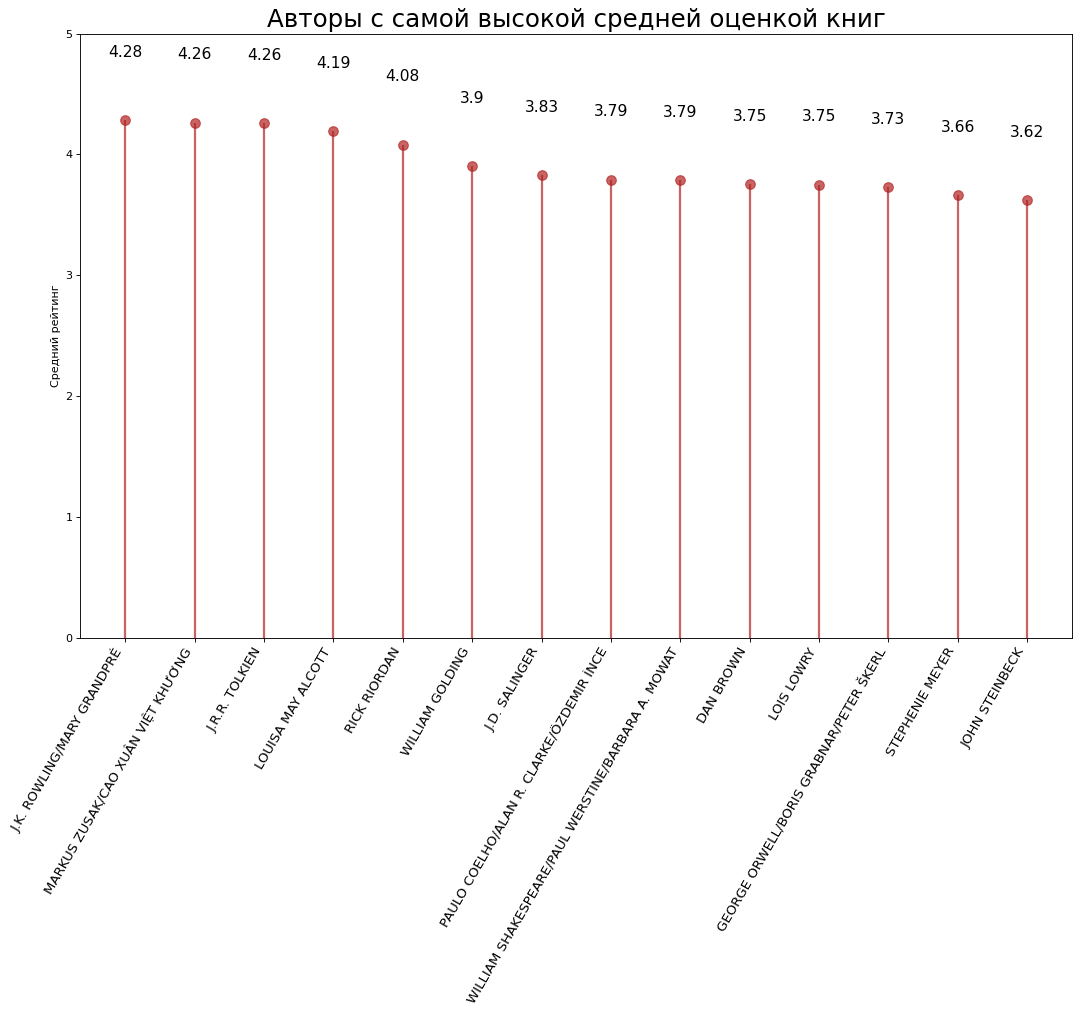

In [50]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=result.index, ymin=0, ymax=result.rating_avg, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=result.index, y=result.rating_avg, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Авторы с самой высокой средней оценкой книг', fontdict={'size':22})
ax.set_ylabel('Средний рейтинг')
ax.set_xticks(result.index)
ax.set_xticklabels(result.author.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 5)

# Annotate
for row in result.itertuples():
    ax.text(row.Index, row.rating_avg+.5, s=round(row.rating_avg, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [51]:
print("Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: {:.0f} шт.".format(
pd.io.sql.read_sql(
    '''
SELECT AVG(count)
FROM (
    SELECT COUNT(text)
    FROM reviews FULL OUTER JOIN (
        SELECT
            ratings.username,
            COUNT(ratings.rating_id) AS rating_cnt
        FROM ratings
        GROUP BY ratings.username
    ) AS ratings_cnt ON ratings_cnt.username = reviews.username
    WHERE rating_cnt > 50
    GROUP BY reviews.username
) AS count;  
    ''',
    con = engine
).iloc[0].values[0]
))

Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24 шт.


## Выводы
[В оглавление](#index)

- Количество книг, выпущенных после 1 января 2000 года: 821 шт.  
Это около 82% всех выпущенных книг, содержащихся в базе данных.
- Издательство Penguin Books, выпустило наибольшее число книг толще 50 страниц — 42 шт.
- У автора J.K. Rowling/Mary GrandPré самая высокая средняя оценка - 4.28 среди книг с 50 и более оценками.
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24 шт.